In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('cleaned_dataset.csv')

In [4]:
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
## Remove day, month, year columns
data.drop(columns=['day', 'month', 'year'], inplace=True, axis=1)

In [6]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
## Encoding
data['Classes'] = np.where(data['Classes'].str.contains('not fire'), 0, 1)

In [8]:
data.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [9]:
data['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
## Independent and dependent features
X = data.drop('FWI', axis=1)
y = data['FWI']

In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, X_test.shape


((182, 11), (61, 11))

In [14]:
## Features correlation
## Highly correlated +ve can be removed
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

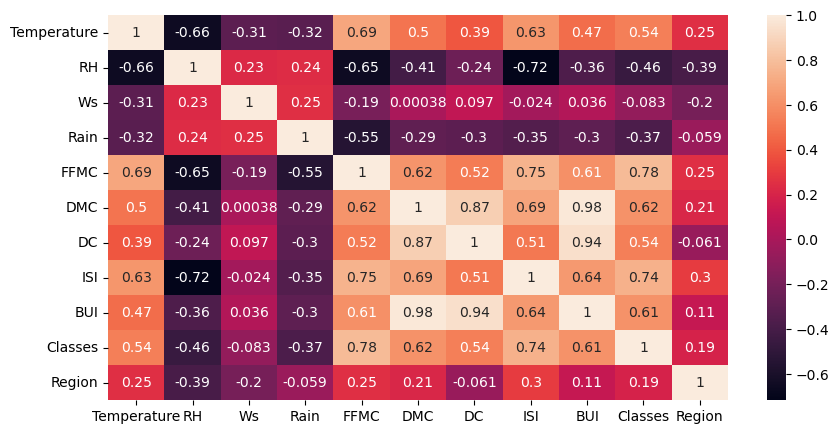

In [15]:
## Check for multicollinearity (Check if independent feature are correlated each other)
## Visualize

plt.figure(figsize=(10, 5))
sns.heatmap(data=X_train.corr(), annot=True)


In [16]:
## Create a logic for check the thersold value against the dataset
def check_thersold_dataset(dataset, thersold):
    correlation = dataset.corr()
    column_name = set()
    for i in range(len(correlation.columns)):
        for j in range(i):
            if abs(correlation.iloc[i, j]) > thersold:
                column_name.add(correlation.columns[i])
    return column_name

In [17]:
## Thershold is set by domain expertise
correlation_features = check_thersold_dataset(X_train, 0.85)

In [18]:
## Drop features when correlation is more than 0.85
X_train.drop(correlation_features, axis=1, inplace=True)
X_test.drop(correlation_features, axis=1, inplace=True)

In [19]:
X_test.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1


In [20]:
## Features scaling or standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After scaling')

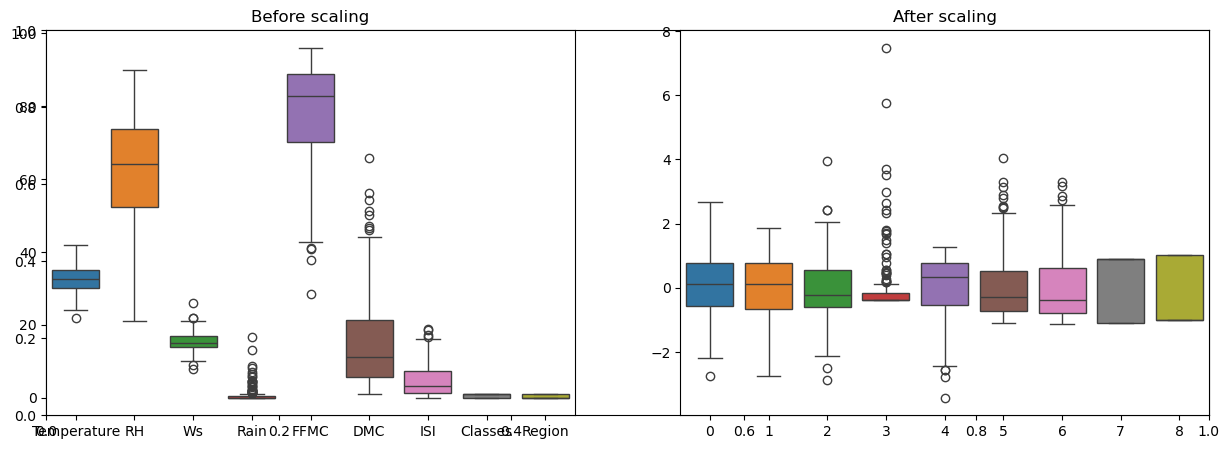

In [21]:
## Box plot to see the outlier before and afer scaling
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title("Before scaling")

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title("After scaling")

In [22]:
## Model training
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_scaled, y_train)


LinearRegression()

In [23]:
y_pred = regression.predict(X_test_scaled)

In [24]:
### Metrics
from sklearn.metrics import mean_absolute_error, r2_score
print(f"Means absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"R2 score {r2_score(y_test, y_pred)}")

Means absolute error 0.5468236465249973
R2 score 0.9847657384266951


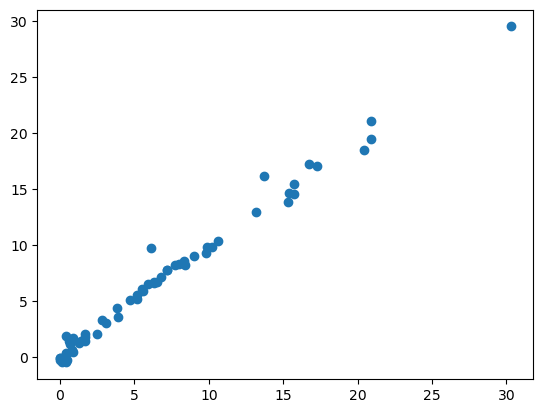

In [25]:
### if y_test and y_pred follows the linear then its best model
plt.scatter(y_test, y_pred)

In [26]:
### Lasso

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [27]:
y_pred = lasso.predict(X_test_scaled)

In [28]:
print(f"Mean absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"r2_score {r2_score(y_test, y_pred)}")

Mean absolute error 1.133175994914409
r2_score 0.9492020263112388


In [29]:
### Ridge

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)


Ridge()

In [30]:
y_pred = ridge.predict(X_test_scaled)

In [31]:
print(f"Mean absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"r2_score {r2_score(y_test, y_pred)}")

Mean absolute error 0.5642305340105692
r2_score 0.9842993364555513


In [32]:
## Elastic Net

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)

ElasticNet()

In [33]:
y_pred = elastic.predict(X_test_scaled)

In [34]:
print(f"Mean absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"R2 score {r2_score(y_test, y_pred)}")

Mean absolute error 1.8822353634896005
R2 score 0.8753460589519703


In [35]:
## Lasso CV

from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled, y_train)
    

LassoCV(cv=5)

In [36]:
y_pred = lassocv.predict(X_test_scaled)

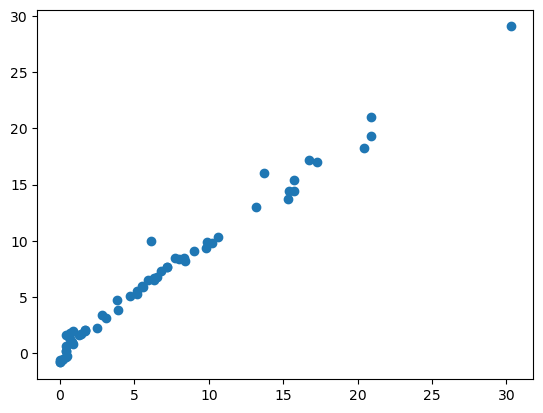

In [37]:
plt.scatter(y_test, y_pred)

In [38]:
print(f"Mean absoulte error {mean_absolute_error(y_test, y_pred)}")
print(f"r2_Score {r2_score(y_test, y_pred)}")

Mean absoulte error 0.619970115826343
r2_Score 0.9820946715928275


In [39]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [40]:
## Ridge CV

from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_absolute_error

ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled, y_train)


RidgeCV(cv=5)

In [41]:
y_pred = ridgecv.predict(X_test_scaled)

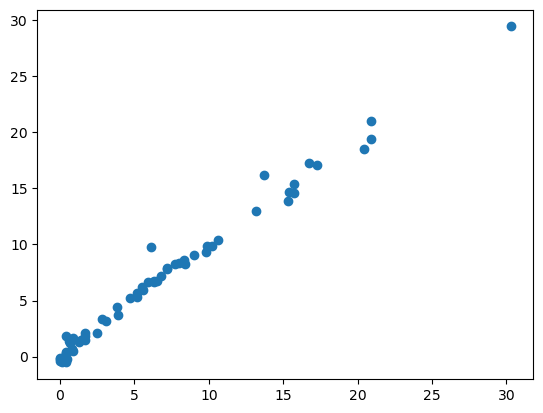

In [42]:
plt.scatter(y_test, y_pred)

In [43]:
print(f"Mean absoulte error {mean_absolute_error(y_test, y_pred)}")
print(f"r2 score {r2_score(y_test, y_pred)}")

Mean absoulte error 0.5642305340105692
r2 score 0.9842993364555513


In [44]:
ridgecv.best_score_

0.9549267274722453

In [45]:
ridgecv.alpha_

1.0

In [46]:
ridgecv.coef_

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [47]:
ridgecv.intercept_

7.156043956043957

In [48]:
## Elastic net cv

from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)

ElasticNetCV(cv=5)

In [49]:
y_pred =elasticcv.predict(X_test_scaled)

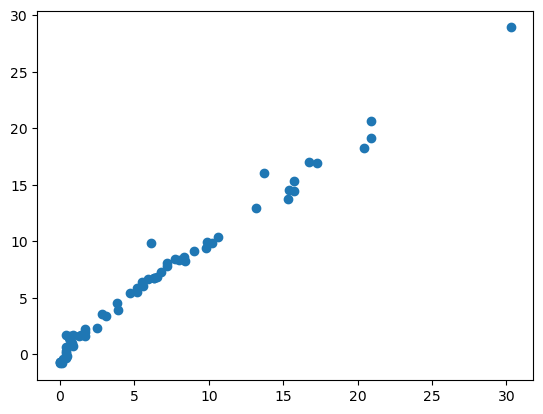

In [50]:
plt.scatter(y_test, y_pred)

In [51]:
print(f"Mean absolute error {mean_absolute_error(y_test, y_pred)}")
print(f"r2_score {r2_score(y_test, y_pred)}")

Mean absolute error 0.6575946731430898
r2_score 0.9814217587854941


In [52]:
elasticcv.alpha_

0.04311146156383891

In [53]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [54]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

In [55]:
### Pickling the model (bz ridge has high r2_score) and preprocessor 
scaler

StandardScaler()

In [56]:
ridge

Ridge()

In [57]:
import pickle
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(ridge, open("ridge.pkl", "wb"))